In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Ames_HousePrice_processed.csv")
len(df)

2579

In [3]:
df = df.iloc[:,2:] # drop column of indexes and PID
df.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale,Prop_Addr,MA_Ownr1,MA_Ownr2,Latitude,Longitude
0,856,126000,30,RL,0.0,7890,Pave,No alley,Reg,Lvl,...,7034,71,2.0,0.0,71.0,436 HAYWARD AVE,"GREINER, RODNEY & CELIA",NaN,42.018564,-93.651619
1,1049,139500,120,RL,42.0,4235,Pave,No alley,Reg,Lvl,...,3186,25,3.0,0.0,25.0,3416 WEST ST,"HUBERT, JOHN F & GRETTA R",NaN,42.024855,-93.663671
2,1001,124900,30,C (all),60.0,6060,Pave,No alley,Reg,Lvl,...,5059,77,1.0,0.0,77.0,320 S 2ND ST,"SKLENAR, TIM","CARNEY, SARAH",42.021548,-93.614068
3,1039,114000,70,RL,80.0,8146,Pave,No alley,Reg,Lvl,...,7429,109,1.0,0.0,69.0,1524 DOUGLAS AVE,"MILLARD, TAMMY",NaN,42.037391,-93.612207
4,1665,227000,60,RL,70.0,8400,Pave,No alley,Reg,Lvl,...,7590,8,3.0,1.0,8.0,2304 FILLMORE AVE,"SEBBAG, LIONEL","LEVIN, ALISON P",42.044554,-93.631818


In [4]:
# drop columns I don't need
df = df.drop(["MA_Ownr1","MA_Ownr2","Prop_Addr","YearBuilt","YrSold"], axis=1)

In [5]:
# find columns with nans
df.columns[df.isna().any()]

Index(['Latitude', 'Longitude'], dtype='object')

In [6]:
# find which rows have nans (68)
df[df.isna().any(axis=1)]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,SaleType,SaleCondition,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale,Latitude,Longitude
10,1342,219500,120,RL,48.0,6240,Pave,No alley,Reg,Lvl,...,2,WD,Normal,4898,2,2.0,0.0,1.0,NaN,NaN
67,1324,254000,120,RL,48.0,6240,Pave,No alley,Reg,Lvl,...,12,WD,Normal,4916,3,3.0,0.0,3.0,NaN,NaN
76,1464,282922,20,RL,49.0,15256,Pave,No alley,IR1,Lvl,...,8,WD,Normal,13792,0,3.0,0.0,0.0,NaN,NaN
79,1012,67500,30,RH,70.0,9800,Pave,No alley,Reg,Lvl,...,4,WD,Normal,8788,90,1.0,0.0,90.0,NaN,NaN
109,1502,330000,120,RM,0.0,9763,Pave,No alley,IR1,Lvl,...,9,WD,Normal,8261,9,2.0,1.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,810,57625,30,I (all),109.0,21780,Grvl,No alley,Reg,Lvl,...,3,ConLD,Normal,20970,99,1.0,0.0,34.0,NaN,NaN
2420,1905,320000,20,RL,84.0,11670,Pave,No alley,IR1,Lvl,...,3,WD,Normal,9765,1,2.0,0.0,1.0,NaN,NaN
2460,1405,171750,120,RL,0.0,3136,Pave,No alley,IR1,Lvl,...,3,WD,Normal,1731,3,2.0,0.0,3.0,NaN,NaN
2524,1689,127500,20,RL,73.0,9855,Pave,No alley,Reg,Lvl,...,11,COD,Normal,8166,53,1.0,0.0,53.0,NaN,NaN


In [7]:
df = df.dropna() # 68 rows have nan for lat and lon
len(df)

2511

In [8]:
# define which features are categorical
categorical = ["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities",
                           "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
                           "HouseStyle","OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st",
                           "Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                           "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC",
                           "CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType",
                           "GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
                           "MiscFeature","MiscVal","MoSold","SaleType","SaleCondition"]

## Dummified version

In [14]:
df_dum = pd.get_dummies(df, columns= categorical)

In [15]:
len(df_dum.columns)

386

In [16]:
# save the dummified df
df_dum.to_pickle("dummified_df.pkl")

## Label Encoded version

In [198]:
df_le = df.copy()
le = LabelEncoder()
for i in categorical:
    df_le[i] = le.fit_transform(df_le[i])
df_le = df_le.reset_index(drop=True)

In [199]:
df_le.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,SaleType,SaleCondition,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale,Latitude,Longitude
0,856,126000,1,4,0.0,7890,1,1,3,3,...,2,9,4,7034,71,2.0,0.0,71.0,42.018564,-93.651619
1,1049,139500,11,4,42.0,4235,1,1,3,3,...,1,9,4,3186,25,3.0,0.0,25.0,42.024855,-93.663671
2,1001,124900,1,0,60.0,6060,1,1,3,3,...,10,9,4,5059,77,1.0,0.0,77.0,42.021548,-93.614068
3,1039,114000,6,4,80.0,8146,1,1,3,3,...,4,9,4,7429,109,1.0,0.0,69.0,42.037391,-93.612207
4,1665,227000,5,4,70.0,8400,1,1,3,3,...,10,9,4,7590,8,3.0,1.0,8.0,42.044554,-93.631818


In [200]:
# save the label encoded df
df_le.to_pickle("labelencoded_df.pkl")

## Colinearities of features - VIF

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif = pd.DataFrame()
vif["feature"] = df_le.columns
  
# calculating VIF for each feature (using label encoded data)
vif["VIF"] = [variance_inflation_factor(df_le.values, i)
                          for i in range(len(df_le.columns))]

vif = vif.sort_values(by=["VIF"], ascending=False)
print(vif.to_string())

/Users/grainneoneill/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            feature           VIF
0         GrLivArea           inf
34       BsmtFinSF1           inf
80    TotalHalfBath           inf
79    TotalFullBath           inf
77       ExteriorSF           inf
5           LotArea           inf
49         HalfBath           inf
48         FullBath           inf
47     BsmtHalfBath           inf
46     BsmtFullBath           inf
45     LowQualFinSF           inf
44         2ndFlrSF           inf
43         1stFlrSF           inf
38      TotalBsmtSF           inf
37        BsmtUnfSF           inf
36       BsmtFinSF2           inf
83        Longitude  4.829269e+06
82         Latitude  4.794287e+06
20     YearRemodAdd  2.439841e+04
70           PoolQC  1.311183e+03
6            Street  3.449129e+02
15       Condition2  9.863817e+01
53     TotRmsAbvGrd  8.673335e+01
1         SalePrice  7.466576e+01
62       GarageCond  6.498821e+01
18      OverallQual  5.838144e+01
51     KitchenAbvGr  5.091875e+01
54       Functional  4.822318e+01
35     BsmtFin

In [284]:
# Feature engineer to reduce VIF

X = df_le.copy()

# drop featurews with redundant info or highly correlated to another feature or has high VIF
X = X.drop(["GrLivArea","MSSubClass","LandSlope","GarageArea","TotalBsmtSF",
               "Longitude","Latitude","GarageAgeAtSale","TotalHalfBath","TotalFullBath",
               "LotArea","MiscVal","Exterior2nd","TotRmsAbvGrd","YearRemodAdd","BsmtFinType2",
               "PoolQC","Street","Condition2","GarageCond","MSZoning","ExterCond","OverallQual",
               "SaleCondition","1stFlrSF","2ndFlrSF","SaleType","LandContour","Alley","Fence",
               "CentralAir","ExterQual","GarageQual","KitchenAbvGr","BsmtCond","Electrical",
               "Functional","Heating","KitchenQual","OverallCond","MasVnrType","PavedDrive",
               "AgeAtSale","Foundation","BsmtExposure","BsmtFinType1","GarageType","FireplaceQu",
               "BsmtQual","Exterior1st","MiscFeature","Condition1","BsmtUnfSF","FullBath",
                "GarageCars","GarageFinish","BedroomAbvGr"], axis=1)

# Change Functional to Typical or not
#for i in range(len(X)):
#    if X.Functional[i] == 6:
#        X.Functional[i] = 1
#    else:
#        X.Functional[i] = 0
        
# Change all porches to has porch or not
X["Porch"] = 0 # add Porch column
for i in range(len(X)):
    if X.WoodDeckSF[i] >0 or X.OpenPorchSF[i] >0 or X.EnclosedPorch[i] >0 or \
    X["3SsnPorch"][i] >0 or X.ScreenPorch[i]:
        X["Porch"][i] = 1
    else:
        X["Porch"][i] = 0
X = X.drop(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"], axis=1)

# Change KitchenAbvGr to 1 kitchen or more than 1
#for i in range(len(X)):
#    if X.KitchenAbvGr[i] == 1:
#        X.KitchenAbvGr[i] = 1
#    else:
#        X.KitchenAbvGr[i] = 0

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_90575/2296389308.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Porch"][i] = 1
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_90575/2296389308.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Porch"][i] = 0


In [285]:
# recalculate VIF
# VIF can find nonlinear relationships
vif = pd.DataFrame()
vif["feature"] = X.columns
  
vif["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                          for i in range(len(X.columns))]

vif = vif.sort_values(by=["VIF"], ascending=False)
print(vif.to_string())

         feature     VIF
0      SalePrice  16.051
22         Porch   5.951
11    BsmtFinSF1   4.957
5   Neighborhood   4.850
1    LotFrontage   4.623
4      LotConfig   4.498
20        MoSold   4.421
7     HouseStyle   4.268
8      RoofStyle   4.243
15  BsmtFullBath   3.517
2       LotShape   3.352
21    ExteriorSF   2.624
18    Fireplaces   2.601
17      HalfBath   2.179
13     HeatingQC   2.003
10    MasVnrArea   1.806
6       BldgType   1.356
12    BsmtFinSF2   1.279
16  BsmtHalfBath   1.245
9       RoofMatl   1.062
14  LowQualFinSF   1.032
19      PoolArea   1.031
3      Utilities   1.012


<AxesSubplot:>

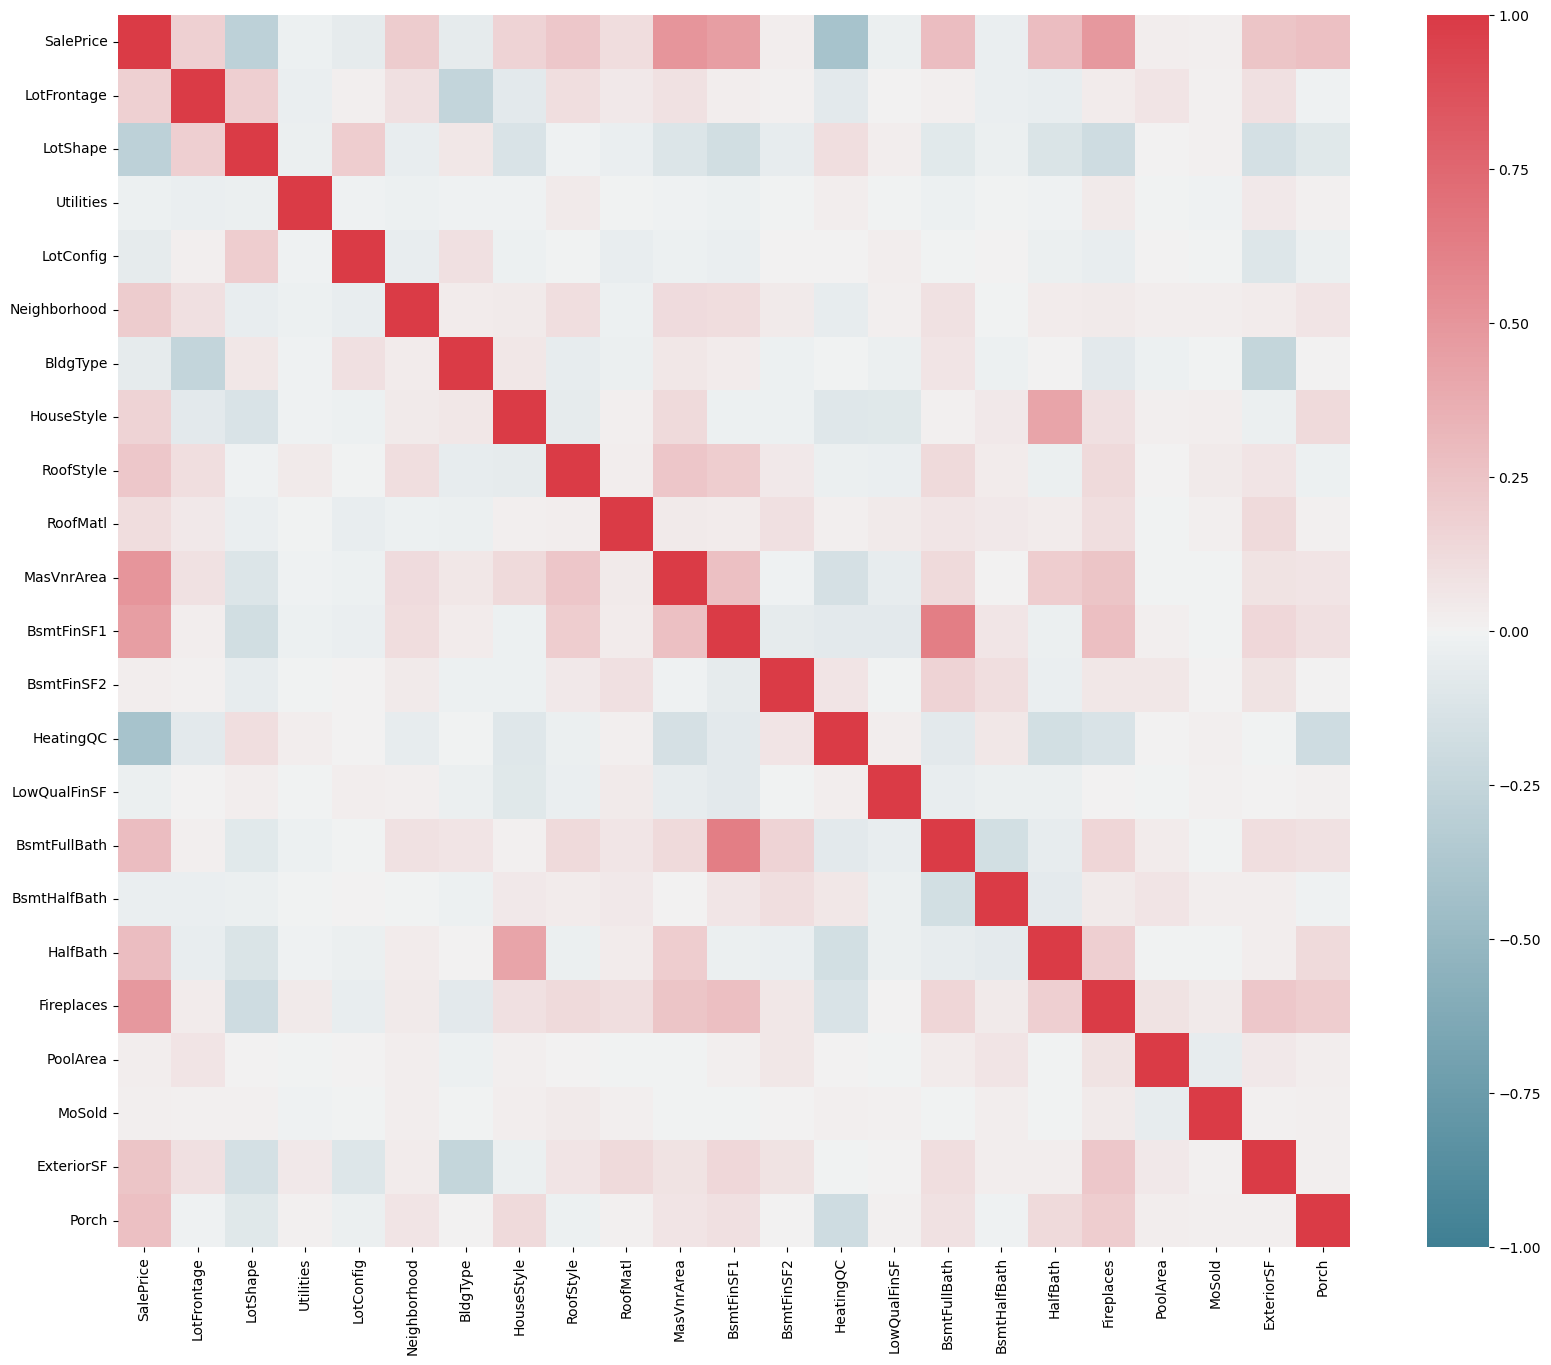

In [286]:
# correlation matrix
# correlation finds linear relationship

import seaborn as sns

f, ax = plt.subplots(figsize=(20, 16))
corr = X.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Attempt 2

Adding to create my feature list instead of subtracting. Checking VIF as I add 

In [393]:
# Feature engineer to reduce VIF

X = df_le.copy()

# drop features
X = X.drop(["GrLivArea","MSSubClass","LandSlope","GarageArea",
               "Longitude","Latitude","GarageAgeAtSale",
               "LotArea","MiscVal","Exterior2nd","TotRmsAbvGrd","YearRemodAdd","BsmtFinType2",
               "PoolQC","Street","Condition2","GarageCond","MSZoning","ExterCond","OverallQual",
               "SaleCondition","2ndFlrSF","SaleType","LandContour","Alley","Fence",
               "CentralAir","ExterQual","GarageQual","KitchenAbvGr","BsmtCond","Electrical",
               "Functional","Heating","OverallCond","MasVnrType","PavedDrive",
               "Foundation","BsmtExposure","BsmtFinType1","GarageType","FireplaceQu",
               "BsmtQual","Exterior1st","MiscFeature","Condition1","FullBath",
                "GarageFinish","BedroomAbvGr",'LotFrontage', 'LotShape', 'Utilities', 'LotConfig',
        'BldgType', 'HouseStyle', 'RoofStyle',"TotalFullBath","GarageCars",
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces',
       'MoSold', 'ExteriorSF','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'], axis=1)

# Has finished basement
X["FinBasmt"] = 0 # add column
for i in range(len(X)):
    if X.TotalBsmtSF[i] - X.BsmtUnfSF[i] >0:
        X["FinBasmt"][i] = 1
    else:
        X["FinBasmt"][i] = 0
X = X.drop(["TotalBsmtSF","BsmtUnfSF"], axis=1)

# Has a pool
X["Pool"] = 0 # add column
for i in range(len(X)):
    if X.PoolArea[i] >0:
        X["Pool"][i] = 1
    else:
        X["Pool"][i] = 0
X = X.drop(["PoolArea"], axis=1)

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_90575/4099021142.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["FinBasmt"][i] = 1
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_90575/4099021142.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["FinBasmt"][i] = 0
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_90575/4099021142.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Pool"][

In [394]:
# recalculate VIF
# VIF can find nonlinear relationships
vif = pd.DataFrame()
vif["feature"] = X.columns
  
vif["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                          for i in range(len(X.columns))]

vif = vif.sort_values(by=["VIF"], ascending=False)
print(vif.to_string())

         feature     VIF
3       1stFlrSF  20.645
0      SalePrice  17.423
4    KitchenQual   6.510
1   Neighborhood   4.707
7       FinBasmt   3.492
5      AgeAtSale   3.298
6  TotalHalfBath   2.079
2       RoofMatl   1.035
8           Pool   1.009


<AxesSubplot:>

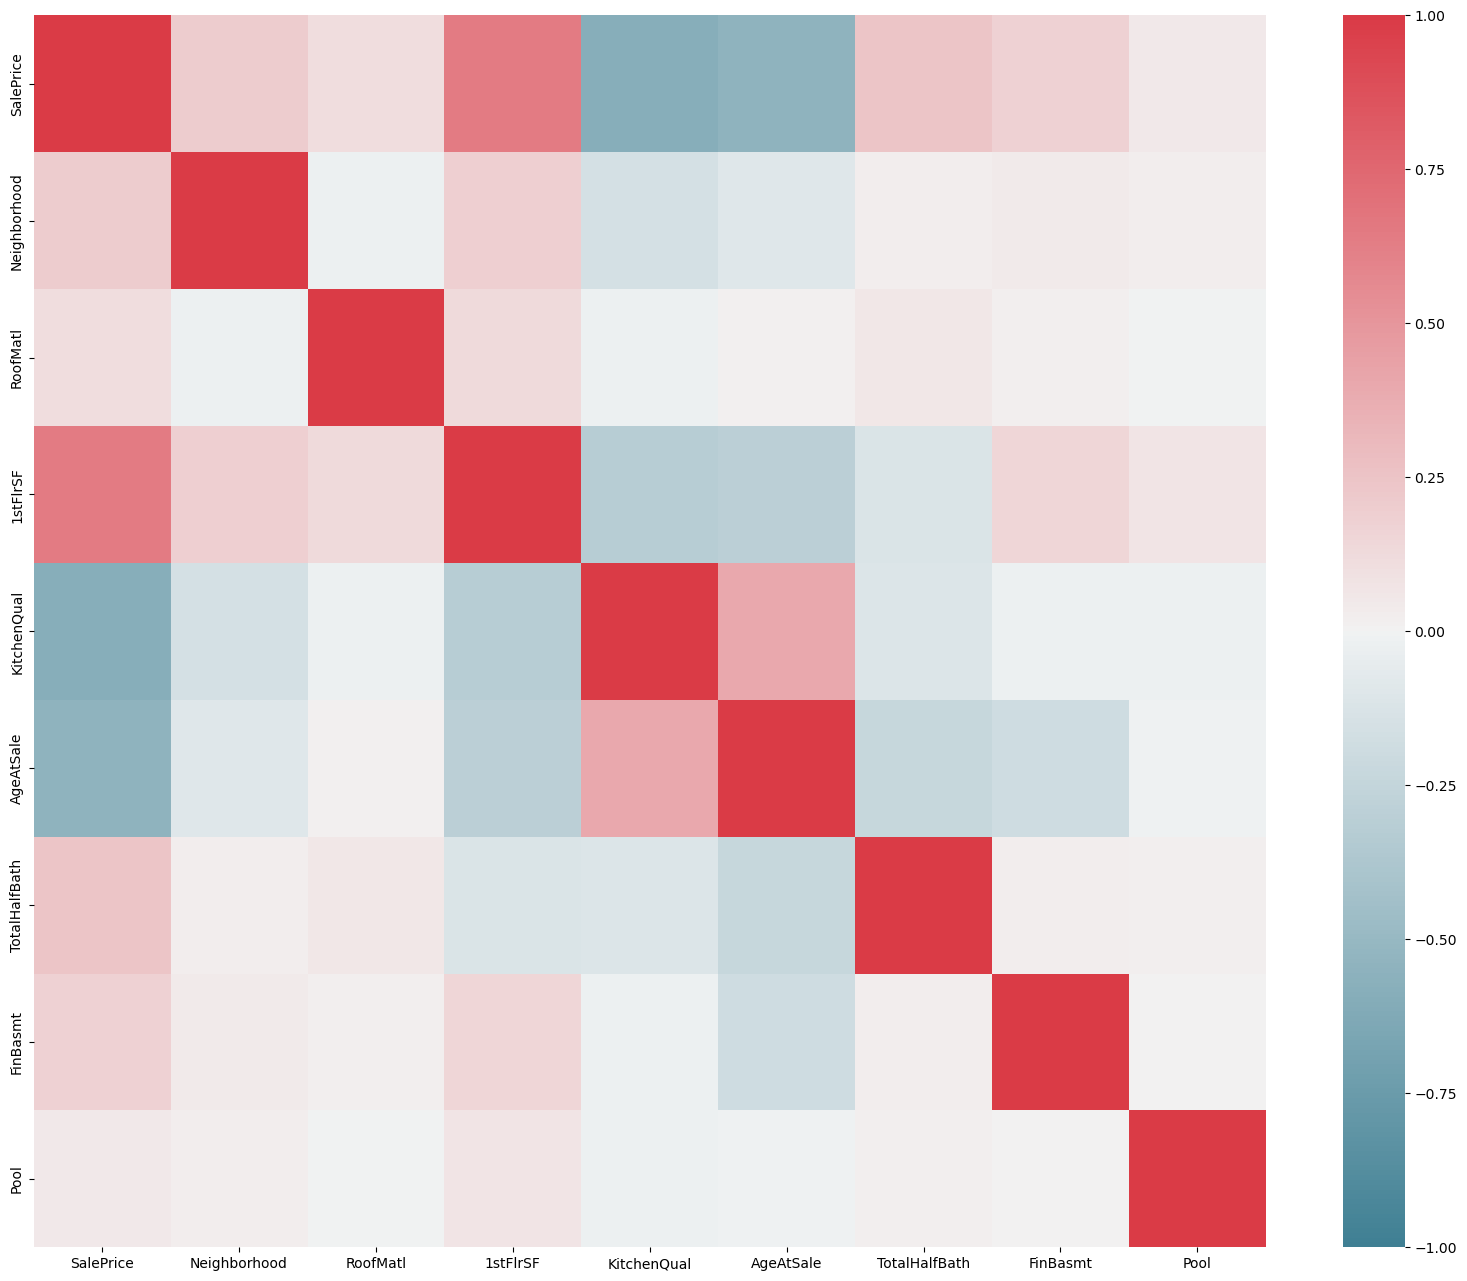

In [395]:
# correlation matrix
# correlation finds linear relationship

import seaborn as sns

f, ax = plt.subplots(figsize=(20, 16))
corr = X.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [396]:
# save the engineered df
X.to_pickle("engineered_df.pkl")